# <span style="color:black"> Esercitazioni - lezione 7 </span>

## <span style="color:black"> Esercizio 07.1 </span>

Si esegua questo codice all'inizio per caricare le librerie e le definizioni utili per il jupyter.  
E' stata definita una funzione di autocorrelazione utile per calcolare questa funzione per i valori di energia potenziale e pressione derivanti dalla simulazione.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
import os

def autocorr(x):
    dim=len(x);
    sigma2=np.var(x);
    tau_max=500;
    ave_prod=np.zeros(tau_max);
    ave_x=np.zeros(tau_max);
    ave_xt=np.zeros(tau_max);
    autoc=np.zeros(tau_max);
    for tau in range(tau_max):
        sum_prod=0;
        sum_x=0;
        sum_xt=0;
        for i in range(dim-tau_max):
            sum_prod=sum_prod+x[i]*x[i+tau];
            sum_x=sum_x+x[i];
            sum_xt=sum_xt+x[i+tau];
        ave_prod[tau]=sum_prod/(dim-tau_max);
        ave_x[tau]=sum_x/(dim-tau_max);
        ave_xt[tau]=sum_xt/(dim-tau_max);
        autoc[tau]=(ave_prod[tau]-ave_x[tau]*ave_xt[tau])/sigma2;
 #       print (ave_prod[tau], '\n', ave_x[tau]*ave_xt[tau], '\n\n')
    return autoc

x=np.arange(0, 150, 1)

def f(x, a):
    return np.exp(a*x)
def f_f(x, a, b):
    return a*np.exp(-b*x)

In questo jupyter sono presentati i risultati delle simulazioni (è anche possibile eseguirle in tempo reale) ottenute per le fasi liquida, solida e gassosa di Argon e Kripton. Innanzitutto sono state effettuate simulazioni Monte Carlo nelle tre fasi per materiali generici per studiare l'andamento di:
- autocorrelazione in funzione del numero di step Monte Carlo per blocco
- errore in funzione del rapporto tra i numero di elementi per blocco ed il numero di blocchi

Prima di iniziare le simulazioni è necessario equilibrare il sistema.  
Innanzitutto è stato scelto un passo adeguato per ogni fase per garantire un'accettazione circa del 50%; si noti che per il gas tuttavia non è stato possibilie scendere al di sotto dell' 85% di  accettazione.   
Per quanto riguarda invece la configurazione iniziale, è stata eseguita una simulazione iniziale con $10^3$ blocchi formati da uno step Monte Carlo e si è salvata la configurazione finale come nuova configurazione di input della run successiva. Questo procedimento è stato effettuato prima di ogni simulazione di ogni fase.

Vengono ora presentati i risultati per l'autocorrelazione.  
Per eseguire le simulazioni sono stati utilizzati $10^5$ blocchi con uno step Monte Carlo ciascuno, e poi se ne è calcolata la funzione di autocorrelazione come definita all'inizio del jupyter.  
Sono riportati di seguito i risultati per le tre fasi: si nota che per la fase liquida i dati risultano del tutto scorrelati dopo circa 200 step, per quella solida sono sufficienti 100 step, metre per quella gassosa ne sono necessari molti meno. Questa è dunque una stima del numero minimo di step da effettuare per ogni blocco per una buona simulazione.  
Si è inoltre provato ad eseguire un fit con una funzione di tipo esponenziale decrescente. E' evidente che, anche modificando l'intervallo di fit dei dati, la funzione di autocorrelazione non mostra un chiaro andamento di tipo esponenziale per nessuna per la fase liquida; è invece leggermente migliore il fit per lo stato solido mentre ancora più accurato quello per lo stato gassoso.  
N.B. Il calcolo della funzione di autocorrelazione comporterà l'attesa di qualche minuto per essere eseguito.

### Fase liquida

Il codice seguente effettua l'equilibrazione del sistema come spiegato sopra.

In [194]:
os.system("./clean.sh")
input_text="1.1 \n108 \n0.8 \n2.5 \n0.2 \n1000 \n1 \n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
file = open("input.dat", "w")
file.write(input_text)
file.close()
os.system("./Monte_Carlo_NVT.exe");
os.system("mv config.final config.0");

Attenzione! Eseguire decommentando il codice sottostante solamente per eseguire di nuovo la simulazione con $10^5$ passi, altrimenti eseguire la cella successiva per visualizzare i risultati di una simulazione precedentemente eseguita.

In [5]:
'''
os.system("./clean.sh");
input_text="1.1 \n108 \n0.8 \n2.5 \n0.2 \n100000 \n1 \n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
file = open("input.dat", "w")
file.write(input_text)
file.close()
os.system("mv config.final config.0");
''';

In [6]:
x1, f1 = np.loadtxt('liquid_big/output.epot.0', usecols=(0,1), unpack='true')
x2, f2 = np.loadtxt('liquid_big/output.pres.0', usecols=(0,1), unpack='true')
a1=autocorr(f1)
a2=autocorr(f2)

[-0.09613674]


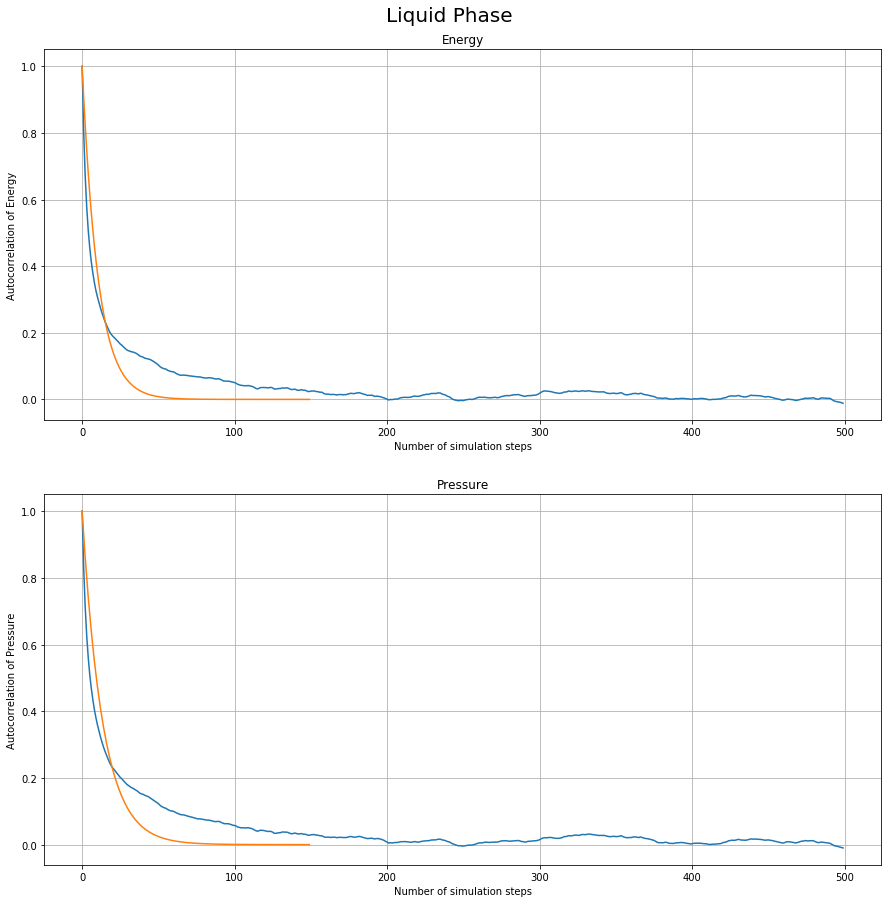

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Liquid Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(a1)
p_opt, p_cov = curve_fit(f, x, a1[0:150], bounds=([-1],[0]))
y_fit = f(x,p_opt[0])
ax1.plot(x,y_fit) # plotting fitted function
ax1.set_xlabel("Number of simulation steps")
ax1.set_ylabel("Autocorrelation of Energy")
ax1.grid()
plt.title("Energy")
print(p_opt)


ax2= fig.add_subplot(gs[1, 0])
ax2.plot(a2)
p_opt2, p_cov2 = curve_fit(f, x, a2[0:150], bounds=([-1],[0]))
y_fit2 = f(x,p_opt2[0])
ax2.plot(x,y_fit2) # plotting fitted function
ax2.set_xlabel("Number of simulation steps")
ax2.set_ylabel("Autocorrelation of Pressure")
ax2.grid()
plt.title("Pressure")

plt.show()

### Fase solida

Il codice seguente effettua l'equilibrazione del sistema come spiegato sopra.

In [8]:
input_text="0.8 \n108 \n1.1 \n2.2 \n0.12 \n1000 \n1 \n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
file = open("input.dat", "w")
file.write(input_text)
file.close()
os.system("./Monte_Carlo_NVT.exe");
os.system("mv config.final config.0");

Attenzione! Eseguire il codice sottostante solamente per eseguire di nuovo la simulazione con $10^5$ passi, altrimenti eseguire la cella successiva per visualizzare i risultati di una simulazione precedentemente eseguita.

In [9]:
'''
os.system("./clean.sh");
input_text="0.8 \n108 \n1.1 \n2.2 \n0.12 \n100000 \n1 \n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
file = open("input.dat", "w")
file.write(input_text)
file.close()
os.system("./Monte_Carlo_NVT.exe");
''';

In [10]:
x1, f1 = np.loadtxt('solid_big/output.epot.0', usecols=(0,1), unpack='true')
x2, f2 = np.loadtxt('solid_big/output.pres.0', usecols=(0,1), unpack='true')
a1=autocorr(f1)
a2=autocorr(f2)

[-0.11944683]
[-0.12151522]


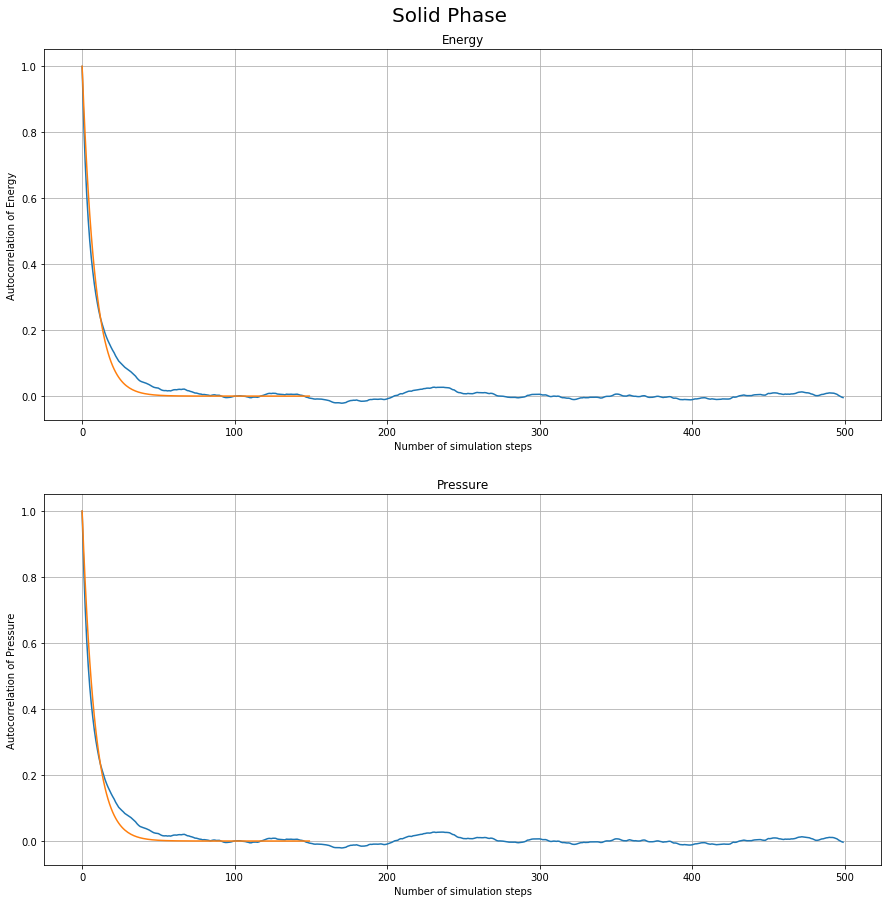

In [11]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Solid Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(a1)
p_opt, p_cov = curve_fit(f, x, a1[0:150], bounds=([-1],[0]))
y_fit = f(x,p_opt[0])
ax1.plot(x,y_fit) # plotting fitted function
ax1.set_xlabel("Number of simulation steps")
ax1.set_ylabel("Autocorrelation of Energy")
ax1.grid()
plt.title("Energy")
print(p_opt)


ax2= fig.add_subplot(gs[1, 0])
ax2.plot(a2)
p_opt2, p_cov2 = curve_fit(f, x, a2[0:150], bounds=([-1],[0]))
y_fit2 = f(x,p_opt2[0])
ax2.plot(x,y_fit2) # plotting fitted function
ax2.set_xlabel("Number of simulation steps")
ax2.set_ylabel("Autocorrelation of Pressure")
ax2.grid()
plt.title("Pressure")
print(p_opt2)


plt.show()

### Fase gassosa

Il codice seguente effettua l'equilibrazione del sistema come spiegato sopra.

In [179]:
os.system("./clean.sh")
input_text="1.2 \n108 \n0.05 \n5.0 \n5 \n1000 \n1 \n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
file = open("input.dat", "w")
file.write(input_text)
file.close()
os.system("./Monte_Carlo_NVT.exe");
os.system("mv config.final config.0");

Attenzione! Eseguire il codice sottostante solamente per eseguire di nuovo la simulazione con $10^5$ passi, altrimenti eseguire la cella successiva per visualizzare i risultati di una simulazione precedentemente eseguita.

In [13]:
'''
os.system("./clean.sh");
input_text="1.2 \n108 \n0.05 \n5.0 \n5 \n100000 \n1 \n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
file = open("input.dat", "w")
file.write(input_text)
file.close()
os.system("./Monte_Carlo_NVT.exe");
''';

In [14]:
x1, f1 = np.loadtxt('gas_big/output.epot.0', usecols=(0,1), unpack='true')
x2, f2 = np.loadtxt('gas_big/output.pres.0', usecols=(0,1), unpack='true')
a1=autocorr(f1)
a2=autocorr(f2)

[-0.36116059]
[-0.99999999]


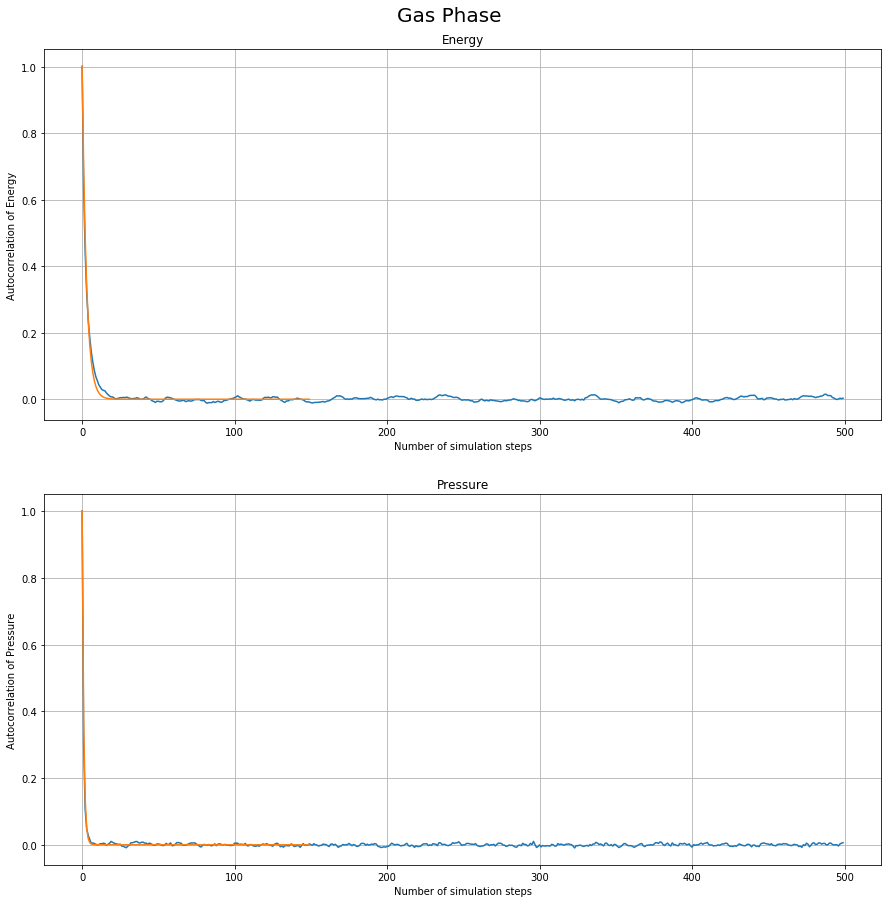

In [15]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Gas Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(a1)
p_opt, p_cov = curve_fit(f, x, a1[0:150], bounds=([-1],[0]))
y_fit = f(x,p_opt[0])
ax1.plot(x,y_fit) # plotting fitted function
ax1.set_xlabel("Number of simulation steps")
ax1.set_ylabel("Autocorrelation of Energy")
ax1.grid()
plt.title("Energy")
print(p_opt)


ax2= fig.add_subplot(gs[1, 0])
ax2.plot(a2)
p_opt2, p_cov2 = curve_fit(f, x, a2[0:150], bounds=([-1],[0]))
y_fit2 = f(x,p_opt2[0])
ax2.plot(x,y_fit2) # plotting fitted function
ax2.set_xlabel("Number of simulation steps")
ax2.set_ylabel("Autocorrelation of Pressure")
ax2.grid()
plt.title("Pressure")
print(p_opt2)


plt.show()

### Parte 2: andamento dell'errore

Nella seconda parte dell'esercizio si è valutato l'andamento dell'errore in funzione del numero di step e di blocchi scelti: il parametro considerato è $L=M/N$ dove $M$ è il numero di step per blocco e $N$ il numero di blocchi.  
I parametri sono stati cambiati tramite lo script sottostante (commentato per evitare attese troppo lunghe) e se ne è stampato in output l'errore.  
Eseguendo un fit sui dati ottenuti (si veda la figura sottostante) con una funzione polinomiale di grado $n$ negativo generico e con una esponenziale, s è visto che la decrescita dell'errore è più che esponenziale; in particolare esso raggiunge valori accettabili a partire da $L=100$ e molto buoni per $L$ tra i $400$ e i $500$.

Attenzione!! Eseguire lo script seguente solo per simulare di nuovo (processo molto lungo!), altrimenti si possono visualizzare i risultati di una precedente simulazione nel box successivo

In [16]:
'''
L=np.zeros(50)
sigma=np.zeros(50)
cont=0;
N=10;
for M in range (100, 5000, 200):
    cont=cont+1;
    input_text = "0.8 \n108 \n1.1 \n2.2 \n0.12 \n" + str(N) + " \n" + str(M) + "\n\n  ReadInput >> temp; \n  ReadInput >> npart; \n  ReadInput >> rho; \n  ReadInput >> rcut; \n  ReadInput >> delta; \n  ReadInput >> nblk; \n  ReadInput >> nstep;"
    file = open("input.dat", 'w')
    file.write(input_text)
    file.close()
    os.system("./Monte_Carlo_NVT.exe");
    file2 = open("output.pres.0", newline='\n')
    for line in file2:
        sigma[cont]=(line[-9:-1])
    file2.close()
    L[cont]=M/N;
    print ("Passo " cont "di 50")
    
file=open("Errore_L2", 'w+')
for i in range(50):
    file.write(str(L[i]))
    file.write('      ')
    file.write(str(sigma[i]))
    file.write('\n')
file.close()
''';

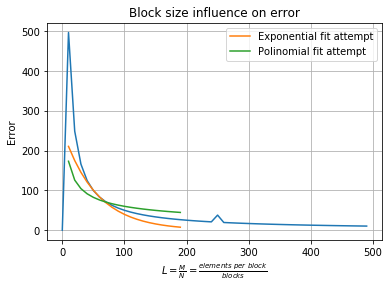

In [19]:
L, sigma = np.loadtxt('Errore_L', usecols=(0,1), unpack='true')
plt.plot(L, sigma);

def polyfit(x, b, n):
    return b*np.power(x,n)

xcut = L[(L>=10) & (L<200)]

p_opt, p_cov = curve_fit(f_f, xcut, sigma[2:21], bounds=([0, -5],[500, 5]))
y_fit = f_f(xcut,p_opt[0],p_opt[1])
plt.plot(xcut,y_fit, label='Exponential fit attempt') # plotting fitted function

p_opt2, p_cov2 = curve_fit(polyfit, xcut, sigma[2:21], bounds=([0, -5],[500, 0]))
y_fit2 = polyfit(xcut,p_opt2[0],p_opt2[1])
plt.plot(xcut,y_fit2, label='Polinomial fit attempt') # plotting fitted function


plt.xlabel(r'$L=\frac{M}{N}=\frac{elements \ per \ block}{blocks}$')
plt.ylabel('Error')
plt.title("Block size influence on error")
plt.grid()
plt.legend()
plt.show()

## Esercizio 07.4

Negli esercizi 07.2 e 07.3 è stato implementato il calcolo della funzione di distribuzine a 2 particelle nel codice fornito e nel codice dell'esercitazione 04 di Dinamica Molecolare.  
Con questi aggiornamenti sono state eseguite le simulazioni delle 3 fasi dei due materiali Argon e Kripton. Grazie ai dati ricavati nei punti precedenti si è scelto di procedere utilizzando $20$ blocchi da $10^3$ step Monte Carlo ciascuno. Questo garantisce sicuramente che i dati siano sempre scorrelati e inoltre minimizza, per quanto possibile, l'errore.

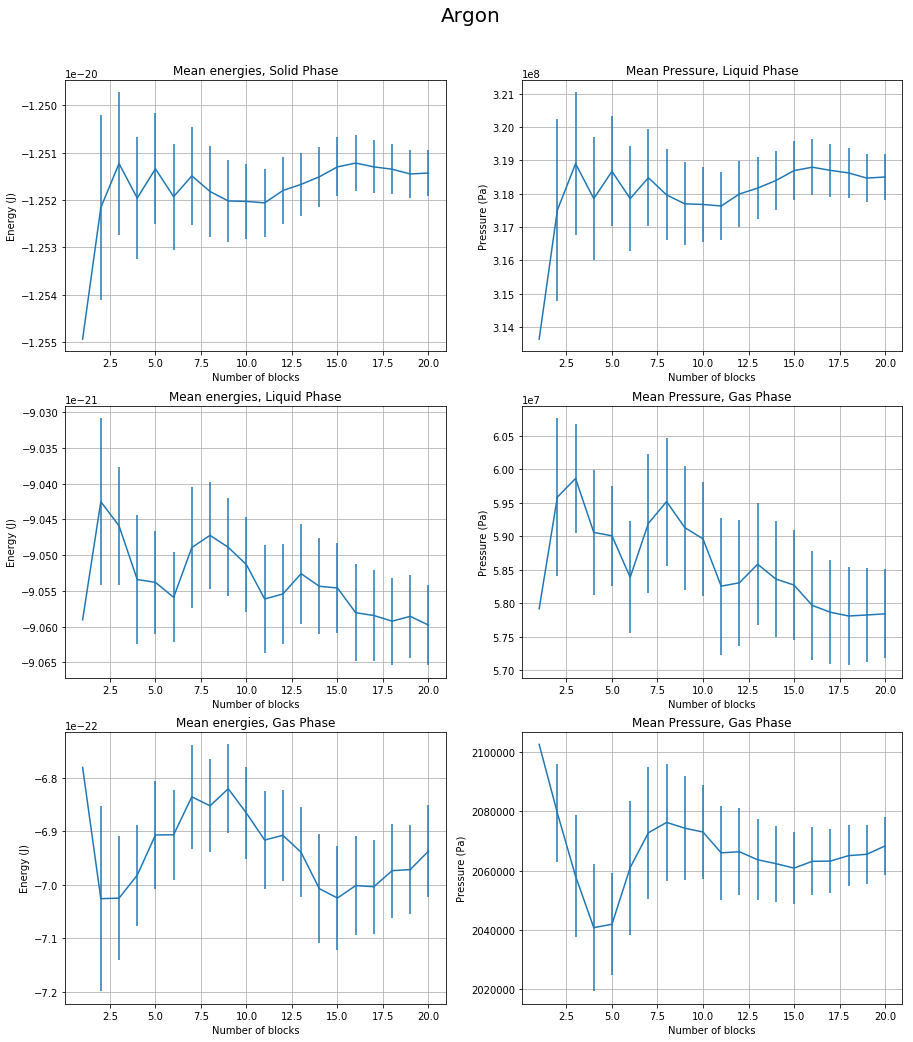

In [3]:
fig = plt.figure(figsize=(15, 17))
fig.suptitle('Argon', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(3, 2, figure=fig)

x2, f2, error2 = np.loadtxt('simu_solid/output.epot_1.dat', usecols=(0,2,3), unpack='true')
ax = fig.add_subplot(gs[0, 0])
ax.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax.set_xlabel("Number of blocks")
ax.set_ylabel("Energy (J)")
ax.grid()
plt.title('Mean energies, Solid Phase')

x1, f1, error1 = np.loadtxt('simu_solid/output.pres_1.dat', usecols=(0,2,3), unpack='true')
ax2= fig.add_subplot(gs[0, 1])
ax2.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax2.plot(x1, 0.8 +x1-x1)
ax2.set_xlabel("Number of blocks")
ax2.set_ylabel("Pressure (Pa)")
ax2.grid()
plt.title("Mean Pressure, Liquid Phase")

x2, f2, error2 = np.loadtxt('simu_liquid/output.epot_1.dat', usecols=(0,2,3), unpack='true')
ax3 = fig.add_subplot(gs[1, 0])
ax3.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax3.set_xlabel("Number of blocks")
ax3.set_ylabel("Energy (J)")
ax3.grid()
plt.title('Mean energies, Liquid Phase')

x1, f1, error1 = np.loadtxt('simu_liquid/output.pres_1.dat', usecols=(0,2,3), unpack='true')
ax4= fig.add_subplot(gs[1, 1])
ax4.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax4.plot(x1, 0.8 +x1-x1)
ax4.set_xlabel("Number of blocks")
ax4.set_ylabel("Pressure (Pa)")
ax4.grid()
plt.title("Mean Pressure, Gas Phase")

x2, f2, error2 = np.loadtxt('simu_gas/output.epot_1.dat', usecols=(0,2,3), unpack='true')
ax5 = fig.add_subplot(gs[2, 0])
ax5.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax5.set_xlabel("Number of blocks")
ax5.set_ylabel("Energy (J)")
ax5.grid()
plt.title('Mean energies, Gas Phase')

x1, f1, error1 = np.loadtxt('simu_gas/output.pres_1.dat', usecols=(0,2,3), unpack='true')
ax6= fig.add_subplot(gs[2, 1])
ax6.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax6.plot(x1, 0.8 +x1-x1)
ax6.set_xlabel("Number of blocks")
ax6.set_ylabel("Pressure (Pa)")
ax6.grid()
plt.title("Mean Pressure, Gas Phase")

plt.show()

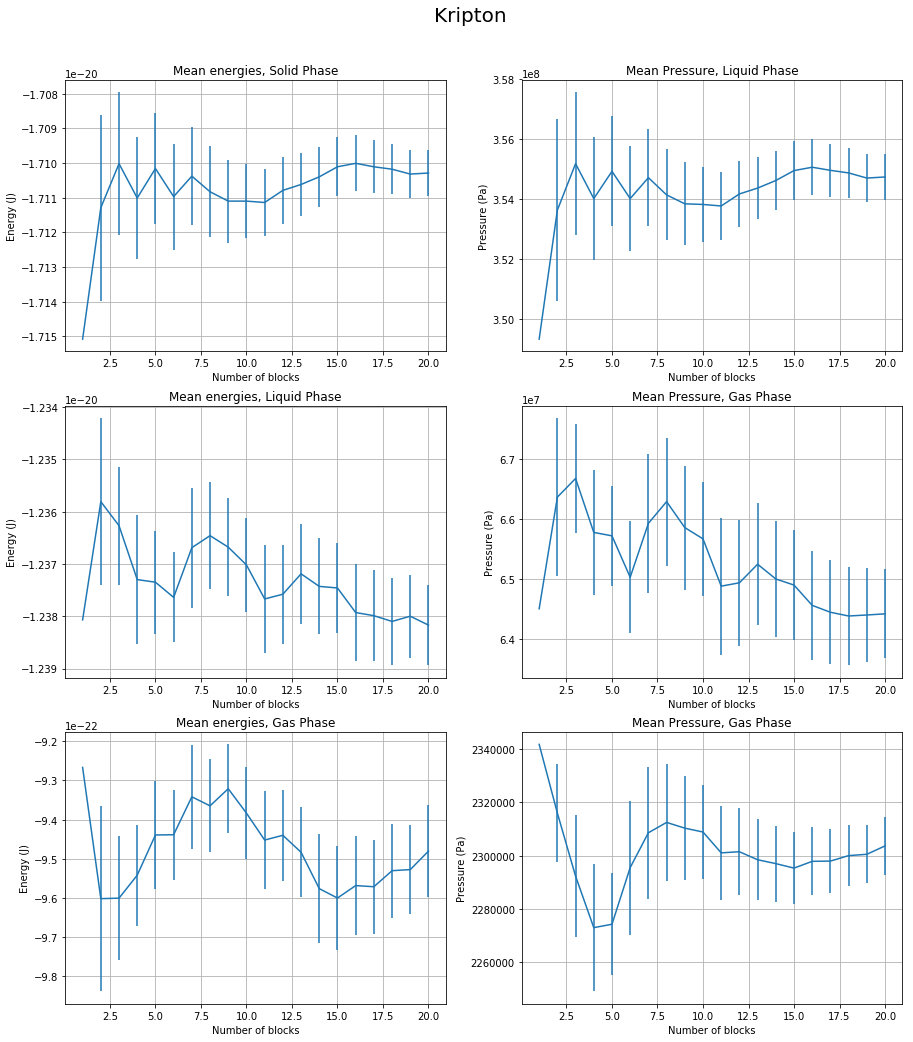

In [4]:
fig = plt.figure(figsize=(15, 17))
fig.suptitle('Kripton', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(3, 2, figure=fig)

x2, f2, error2 = np.loadtxt('simu_solid/output.epot_2.dat', usecols=(0,2,3), unpack='true')
ax = fig.add_subplot(gs[0, 0])
ax.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax.set_xlabel("Number of blocks")
ax.set_ylabel("Energy (J)")
ax.grid()
plt.title('Mean energies, Solid Phase')

x1, f1, error1 = np.loadtxt('simu_solid/output.pres_2.dat', usecols=(0,2,3), unpack='true')
ax2= fig.add_subplot(gs[0, 1])
ax2.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax2.plot(x1, 0.8 +x1-x1)
ax2.set_xlabel("Number of blocks")
ax2.set_ylabel("Pressure (Pa)")
ax2.grid()
plt.title("Mean Pressure, Liquid Phase")

x2, f2, error2 = np.loadtxt('simu_liquid/output.epot_2.dat', usecols=(0,2,3), unpack='true')
ax3 = fig.add_subplot(gs[1, 0])
ax3.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax3.set_xlabel("Number of blocks")
ax3.set_ylabel("Energy (J)")
ax3.grid()
plt.title('Mean energies, Liquid Phase')

x1, f1, error1 = np.loadtxt('simu_liquid/output.pres_2.dat', usecols=(0,2,3), unpack='true')
ax4= fig.add_subplot(gs[1, 1])
ax4.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax4.plot(x1, 0.8 +x1-x1)
ax4.set_xlabel("Number of blocks")
ax4.set_ylabel("Pressure (Pa)")
ax4.grid()
plt.title("Mean Pressure, Gas Phase")

x2, f2, error2 = np.loadtxt('simu_gas/output.epot_2.dat', usecols=(0,2,3), unpack='true')
ax5 = fig.add_subplot(gs[2, 0])
ax5.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax5.set_xlabel("Number of blocks")
ax5.set_ylabel("Energy (J)")
ax5.grid()
plt.title('Mean energies, Gas Phase')

x1, f1, error1 = np.loadtxt('simu_gas/output.pres_2.dat', usecols=(0,2,3), unpack='true')
ax6= fig.add_subplot(gs[2, 1])
ax6.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax6.plot(x1, 0.8 +x1-x1)
ax6.set_xlabel("Number of blocks")
ax6.set_ylabel("Pressure (Pa)")
ax6.grid()
plt.title("Mean Pressure, Gas Phase")

plt.show()

Infine è presentato il confronto tra le funzioni di distribuzione a 3 particelle calcolate con le simulazioni effettuate dai due codici. Si sono riportati solamente i risultati per l'Argon, in quanto non presentano differenze significative con quelli del Kripton.  
Si nota che per la fase solida la coincidenza è pressochè perfetta, nella fase liquida è molto buon, mentre per la fase gassosa inizia a comparire qualche piccola differenza.

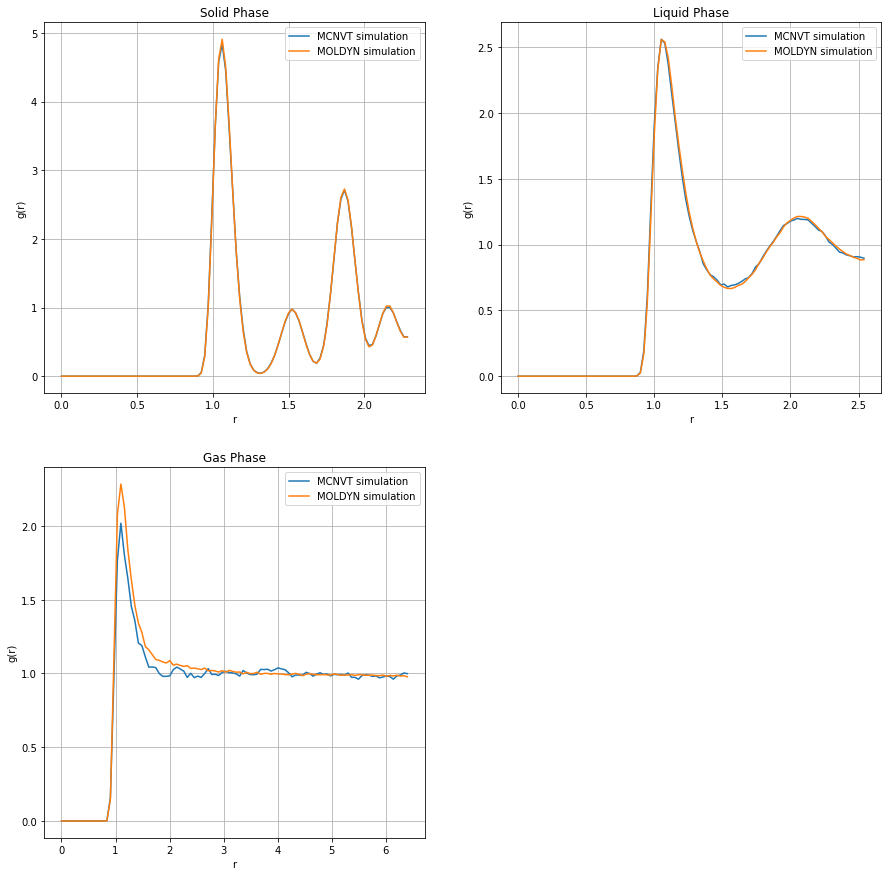

In [190]:
fig = plt.figure(figsize=(15, 15))
#fig.suptitle('Argon', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
r, gofr = np.loadtxt('MOLDYN/solid/output.gave_1.dat', usecols=(0,1), unpack='true')
r1, gofr1 = np.loadtxt('simu_solid/output.gave_1.dat', usecols=(0,1), unpack='true')
plt.plot(r, gofr, label='MCNVT simulation');
plt.plot(r1, gofr1, label='MOLDYN simulation');
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid()
plt.title('Solid Phase')
plt.legend()

ax2 = fig.add_subplot(gs[0,1])
r, gofr = np.loadtxt('MOLDYN/liquid/output.gave_1.dat', usecols=(0,1), unpack='true')
r1, gofr1 = np.loadtxt('simu_liquid/output.gave_1.dat', usecols=(0,1), unpack='true')
plt.plot(r, gofr, label='MCNVT simulation');
plt.plot(r1, gofr1, label='MOLDYN simulation');
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid()
plt.title('Liquid Phase')
plt.legend()

ax3 = fig.add_subplot(gs[1,0])
r, gofr = np.loadtxt('MOLDYN/gas/output.gave_1.dat', usecols=(0,1), unpack='true')
r1, gofr1 = np.loadtxt('simu_gas/output.gave_1.dat', usecols=(0,1), unpack='true')
plt.plot(r, gofr, label='MCNVT simulation');
plt.plot(r1, gofr1, label='MOLDYN simulation');
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid()
plt.title('Gas Phase')
plt.legend()

plt.show()